***************

## [Final_project] 서울시 배수펌프장 정보

***************

### > 데이터 살펴보기

### 🌧️ 필요한 패키지 설치 및 불러오기

In [24]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## 에러문구 없애기
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.8f}'.format

## 한글깨짐 방지
plt.rc('font', family='NanumBarunGothic')

In [2]:
'''
# 한글 폰트 설치 런타임 재시작 이후 셀 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''

'\n# 한글 폰트 설치 런타임 재시작 이후 셀 실행\n!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n'

### 🌧️ 데이터 불러오기

In [3]:
# 현재 작업 디렉토리
!pwd

/content


In [4]:
# 구글 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 원하는 위치로 경로 바꾸기
# 본인이 만든 폴더 위치를 사용
%cd /content/drive/MyDrive/final_project

/content/drive/MyDrive/final_project


In [6]:
# CSV 파일 읽기
dat = pd.read_csv("서울시 배수펌프장 정보.csv", encoding='cp949') ; dat.head(3)

,하천기본계획코드,일련번호,하천기본계획 사업명,수립년도,시설물명,하천명,하천등급,상세주소,주소,유역면적,...,시설관리자,구분,배수문규격,배수문바닥표고,간선수로,지선수로,유수지표고_HWL,유수지표고_LWL,유수지면적,유수지용량
0,1025540201510,72,안양천권역 하천기본계획,2015,구로2 빗물펌프장,도림천,지방하천,서울시 구로구 구로4동 120-5,NaN,0.5,...,구로구,구로2 유수지,3.00×2.00@2,7.9,NaN,NaN,NaN,NaN,962,"1,904"
1,1024910201510,33,탄천 등 10개 하천기본계획,2015,몽촌2,성내천,지방하천,풍납동 471,NaN,8.2,...,송파구,성내천 고지수문,4.0×4.0×10,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1024910201510,34,탄천 등 10개 하천기본계획,2015,성내,성내천,지방하천,방이동 88-13,NaN,6.3,...,강동구,성내 배수문(내)-성내천,4.0×3.0×2,8.4,NaN,NaN,NaN,9.5,"59,508","237,000"


In [7]:
# 결측치 확인
missing_values = dat.isnull().sum()
print(missing_values)

### 구로 가공할만 한 데이터가 없음 >>

하천기본계획코드       0
일련번호           0
하천기본계획 사업명     0
수립년도           0
시설물명           0
하천명            0
하천등급           0
상세주소           0
주소            68
유역면적           1
보호면적          10
시행기관          86
본류하천_유역면적      5
본류하천_홍수량       9
본류하천_계획빈도      9
제방고            9
계획홍수위          3
부지표고          61
기계실바닥표고       62
전기실바닥표고       87
배수장_최대배수량      1
배수장_계획빈도       1
초기흡입수위        24
전동기            0
펌프규격          29
전양정           58
실양정           91
토출수위          41
시설관리자         36
구분            22
배수문규격         33
배수문바닥표고       42
간선수로          89
지선수로          89
유수지표고_HWL     95
유수지표고_LWL     86
유수지면적         61
유수지용량         42
dtype: int64


In [8]:
# '상세주소' 열에서 구 정보 추출
dat['구'] = dat['상세주소'].apply(lambda x: re.search(r'\b(\w+구)\b', x).group(1) if pd.notna(x) and re.search(r'\b(\w+구)\b', x) else None)

# '구' 정보가 NaN인 경우 '시설관리자' 열에서 구 정보 추출
dat['구'] = dat.apply(lambda row: row['구'] if pd.notna(row['구']) else (row['시설관리자'] if pd.notna(row['시설관리자']) and re.search(r'\b(\w+구)\b', row['시설관리자']) else None), axis=1)

# '서구' 데이터 제거 (서구는 인천에 해당되어 제거하였음)
dat = dat[dat['구'] != '서구']

dat['구']

0      구로구
1      송파구
2      강동구
3      강동구
4      강동구
      ... 
91     성동구
92    동대문구
93    동대문구
94    동대문구
95    동대문구
Name: 구, Length: 91, dtype: object

In [9]:
# 구별로 데이터프레임 나누기
gu_groups = dat.groupby('구')

# 각 구별 데이터프레임 생성
gu_dfs = {gu: gu_data for gu, gu_data in gu_groups}

# 예시: 구로구 데이터 출력
gu_dfs['구로구'].head(3)

,하천기본계획코드,일련번호,하천기본계획 사업명,수립년도,시설물명,하천명,하천등급,상세주소,주소,유역면적,...,구분,배수문규격,배수문바닥표고,간선수로,지선수로,유수지표고_HWL,유수지표고_LWL,유수지면적,유수지용량,구
0,1025540201510,72,안양천권역 하천기본계획,2015,구로2 빗물펌프장,도림천,지방하천,서울시 구로구 구로4동 120-5,NaN,0.5,...,구로2 유수지,3.00×2.00@2,7.9,NaN,NaN,NaN,NaN,962,"1,904",구로구
18,1025530201510,65,안양천권역 하천기본계획,2015,개봉1,오류천,지방하천,서울시 구로구 개봉동 189,NaN,45.5,...,개봉 7련,6.0×6.5@7,NaN,NaN,NaN,NaN,NaN,"16,000","156,000",구로구
19,1025530201510,66,안양천권역 하천기본계획,2015,개봉1,오류천,지방하천,서울시 구로구 개봉동 189,NaN,45.5,...,개봉천 유입,5.0×5.0@2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,구로구


### 🌧️  구별 배수펌프장 개수

In [10]:
# 구별 배수펌프장 개수 요약

gu_summary = dat['구'].value_counts().sort_index()
gu_summary

구
강남구      7
강동구      8
관악구      3
광진구      1
구로구     14
금천구      1
노원구      1
동대문구    13
마포구      6
서초구      3
성동구      9
성북구      2
송파구      8
영등포구    10
은평구      1
중랑구      4
Name: count, dtype: int64

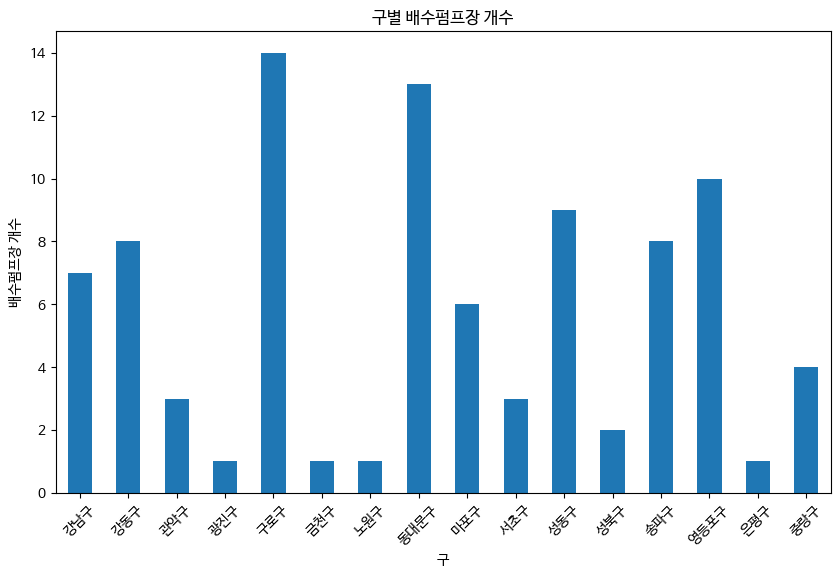

In [14]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
gu_summary.plot(kind='bar')
plt.title('구별 배수펌프장 개수')
plt.xlabel('구')
plt.ylabel('배수펌프장 개수')
plt.xticks(rotation=45)
plt.show()

### 🌧️  구별 하천등급 분포

In [22]:
# 구별 하천등급 분포
gu_grade_summary = dat.groupby(['구', '하천등급']).size().unstack(fill_value=0)

# 요약 결과 출력
print(gu_grade_summary)

하천등급  국가하천  지방하천
구               
강남구      0     7
강동구      0     8
관악구      0     3
광진구      1     0
구로구      0    14
금천구      0     1
노원구      0     1
동대문구     9     4
마포구      0     6
서초구      0     3
성동구      7     2
성북구      0     2
송파구      0     8
영등포구     0    10
은평구      0     1
중랑구      3     1


In [19]:
# 구와 하천등급에 따른 배수펌프장 개수 요약
gu_grade_summary = dat.groupby(['구', '하천등급']).size().unstack(fill_value=0)

# 요약 결과 출력
print(gu_grade_summary)

하천등급  국가하천  지방하천
구               
강남구      0     7
강동구      0     8
관악구      0     3
광진구      1     0
구로구      0    14
금천구      0     1
노원구      0     1
동대문구     9     4
마포구      0     6
서초구      0     3
성동구      7     2
성북구      0     2
송파구      0     8
영등포구     0    10
은평구      0     1
중랑구      3     1


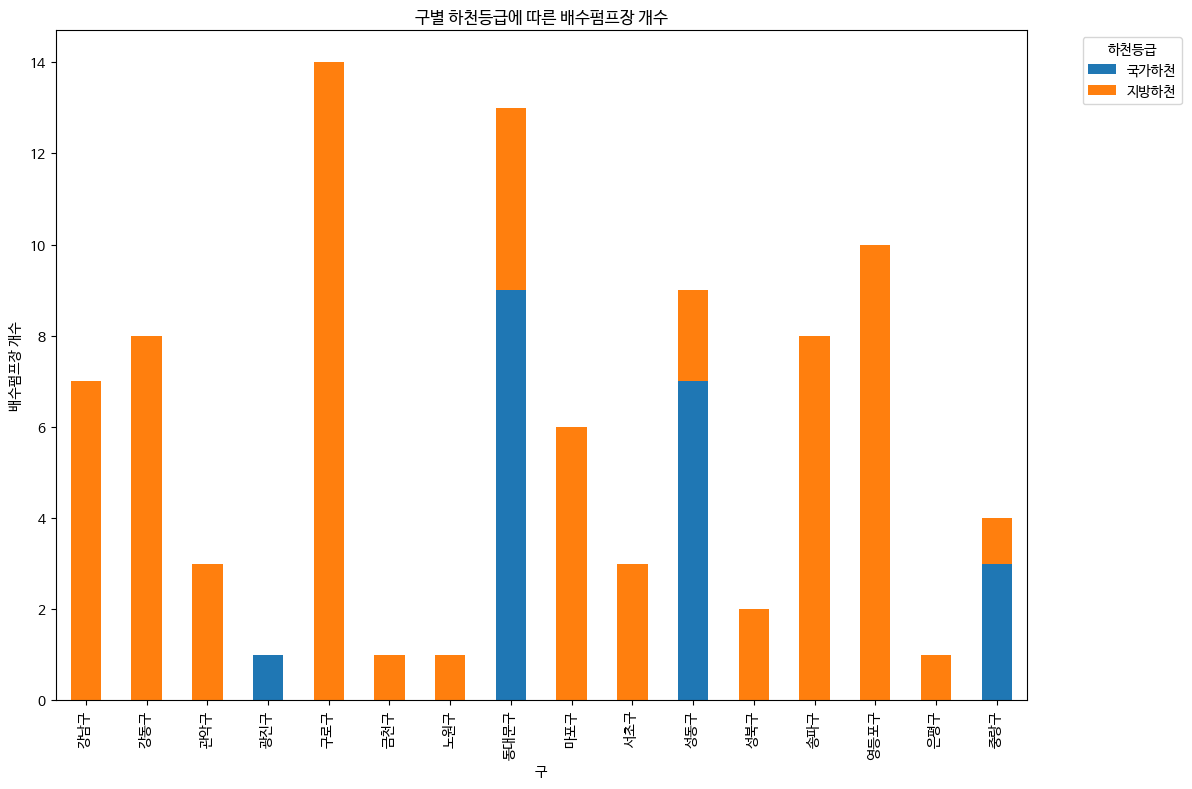

In [20]:
# 히스토그램 그리기

fig, ax = plt.subplots(figsize=(12, 8))
gu_grade_summary.plot(kind='bar', stacked=True, ax=ax)
plt.title('구별 하천등급에 따른 배수펌프장 개수')
plt.xlabel('구')
plt.ylabel('배수펌프장 개수')
plt.legend(title='하천등급', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 🌧️  구별 유역면적 분포
#### ("유역 면적" 이란 하천 주변 일대의 면적입니다. 더 정확히 말하면, 비가 올 때 그 비가 하천으로 흘러 들어가는 같은 범위의 면적)

In [28]:
# 구별 유역면적 통계량 요약
gu_area_summary = dat.groupby('구')['유역면적'].describe()

# 요약 결과 출력
print(gu_area_summary)

           count        mean         std        min        25%        50%  \
구                                                                           
강남구   7.00000000  5.80000000  0.00000000 5.80000000 5.80000000 5.80000000   
강동구   8.00000000  7.27500000  0.84134246 6.30000000 6.30000000 7.65000000   
관악구   3.00000000  1.00000000  0.00000000 1.00000000 1.00000000 1.00000000   
광진구   1.00000000  2.00000000         NaN 2.00000000 2.00000000 2.00000000   
구로구  14.00000000 14.03571429 20.76848971 0.30000000 0.42500000 0.95000000   
금천구   1.00000000  0.80000000         NaN 0.80000000 0.80000000 0.80000000   
노원구   1.00000000  0.70000000         NaN 0.70000000 0.70000000 0.70000000   
동대문구 13.00000000  0.81538462  1.00485999 0.00000000 0.20000000 0.40000000   
마포구   6.00000000  0.70000000  0.31622777 0.20000000 0.52500000 0.90000000   
서초구   3.00000000  0.60000000  0.00000000 0.60000000 0.60000000 0.60000000   
성동구   8.00000000  2.20000000  2.18043246 0.40000000 0.97500000 1.15000000   

<Figure size 1500x1000 with 0 Axes>

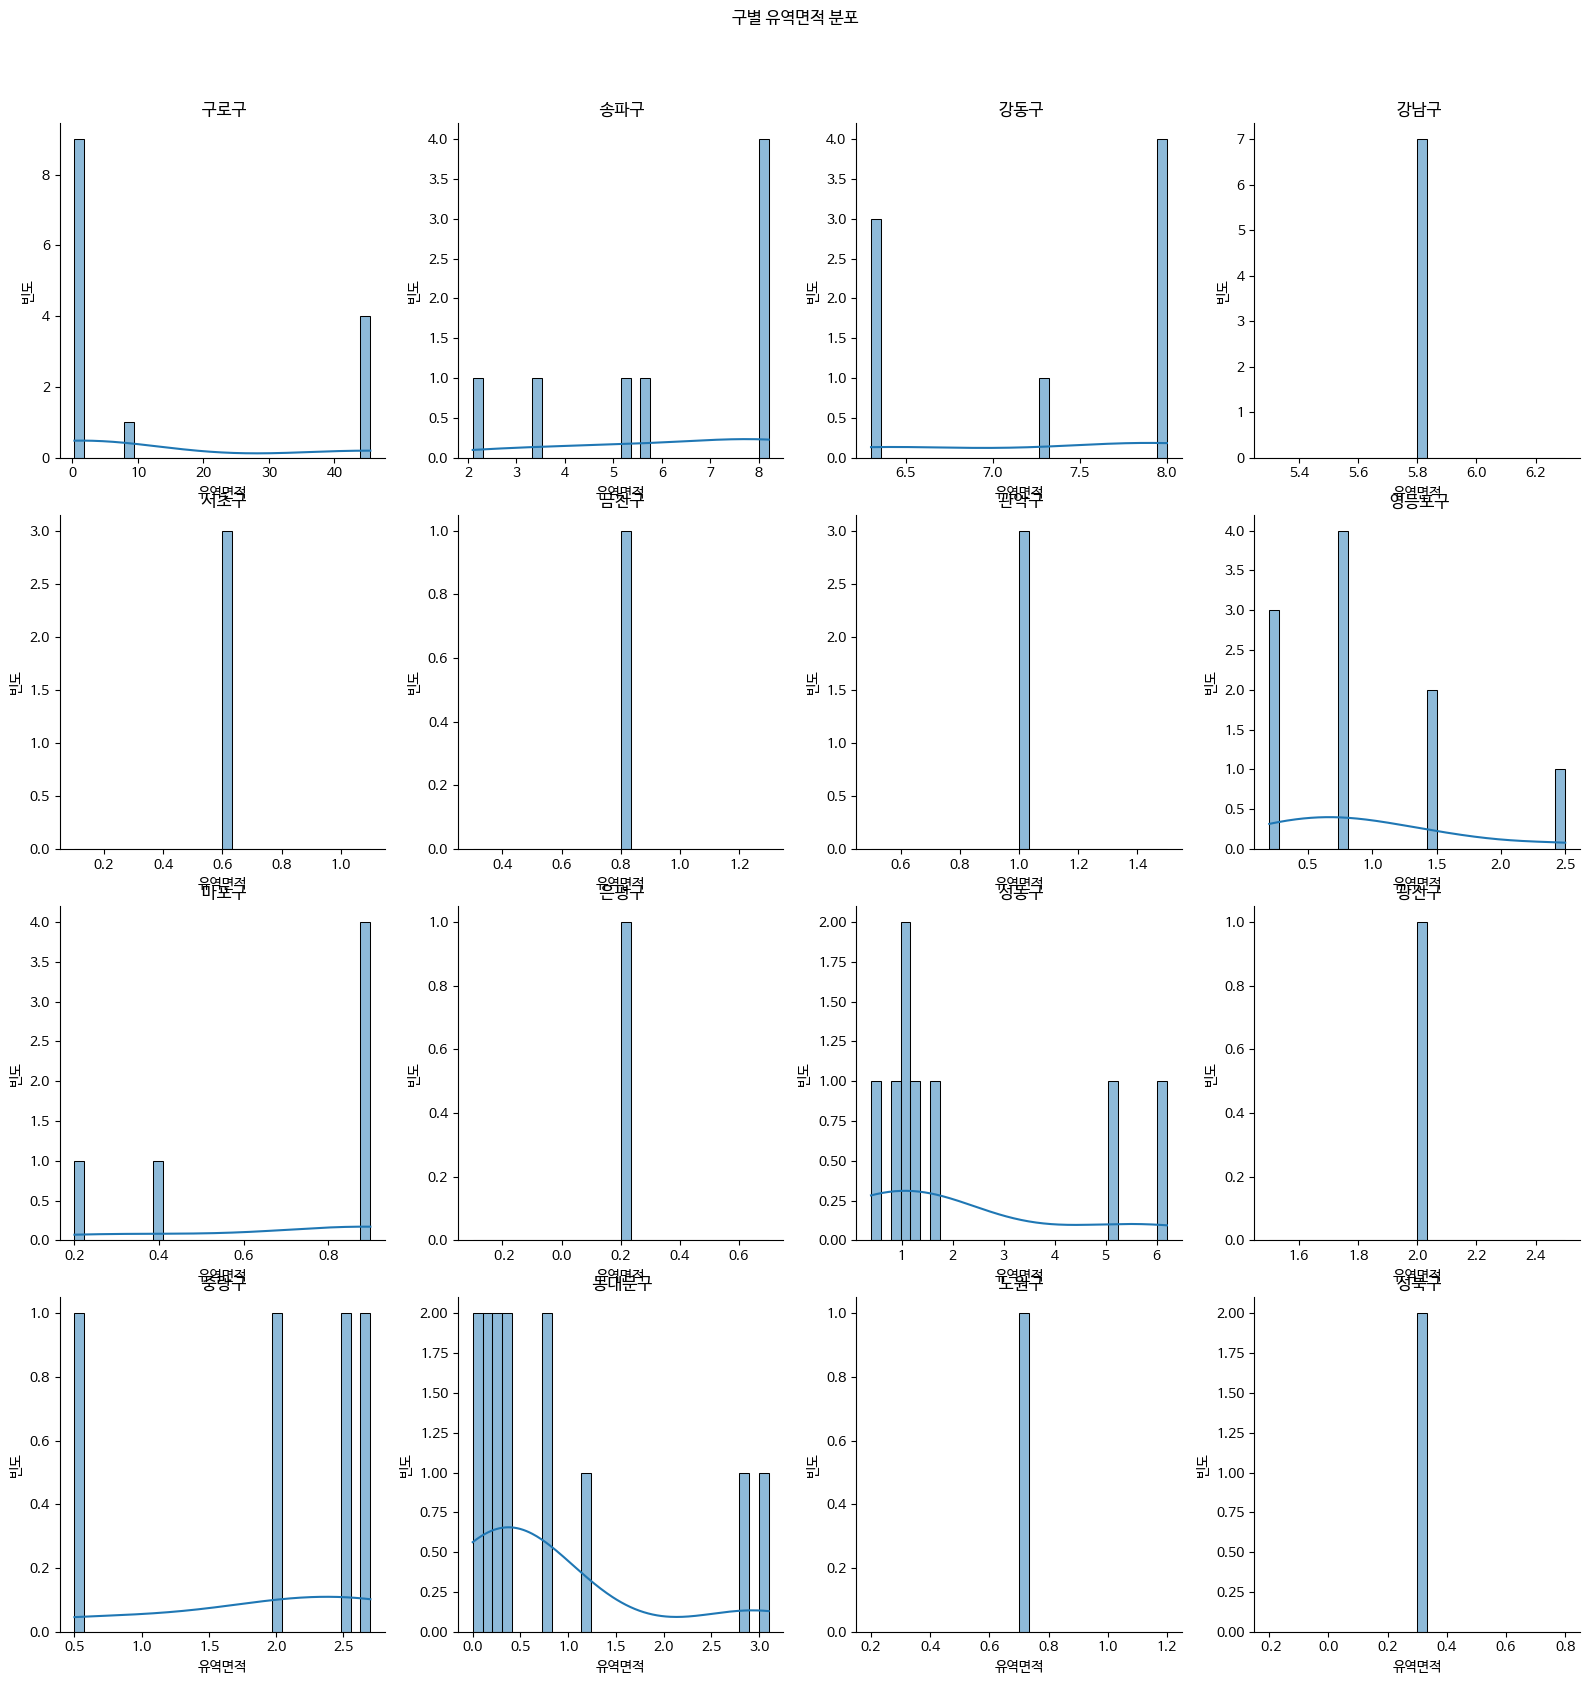

In [29]:
# 구별로 유역면적 분포를 시각화
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(dat, col='구', col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, '유역면적', bins=30, kde=True)

# 각 플롯에 제목 추가
for ax in g.axes.flat:
    ax.set_title(ax.get_title().split('=')[1])  # 구 이름만 표시되도록 제목 수정
    ax.set_xlabel('유역면적')
    ax.set_ylabel('빈도')

plt.suptitle('구별 유역면적 분포', y=1.05)
plt.show()

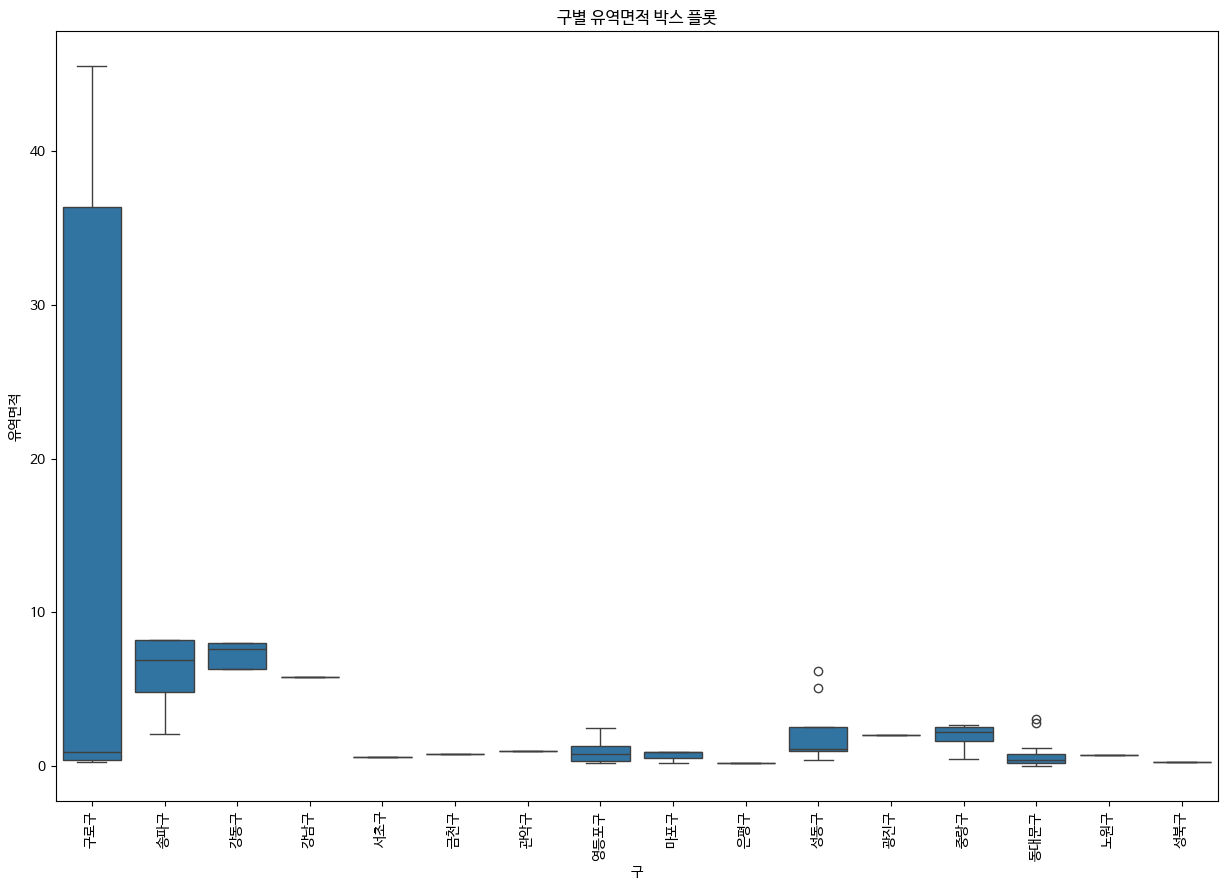

In [27]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=dat, x='구', y='유역면적')
plt.title('구별 유역면적 박스 플롯')
plt.xlabel('구')
plt.ylabel('유역면적')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.show()

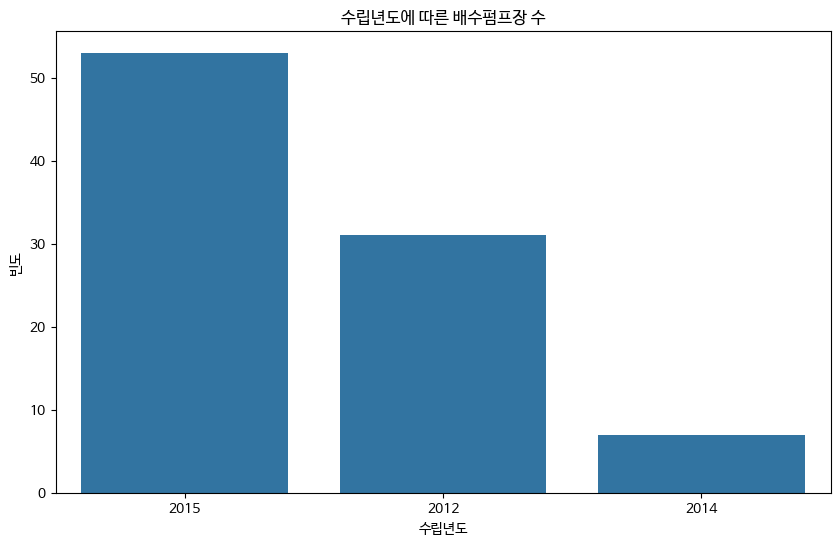

In [31]:
# 시간에 따른 배수펌프장 수 변화 분석
plt.figure(figsize=(10, 6))
sns.countplot(x='수립년도', data=dat, order=dat['수립년도'].value_counts().index)
plt.title('수립년도에 따른 배수펌프장 수')
plt.xlabel('수립년도')
plt.ylabel('빈도')
plt.show()